In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vega_datasets import data

df = data.sf_temps()
df = df.set_index('date')

1) Resample by the day and take the average temperature. Visualize the average temperature over time. <br>
2) Write the code necessary to visualize the minimum temperature over time. <br>
3) Write the code necessary to visualize the maximum temperature over time. <br>

In [3]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    8759 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


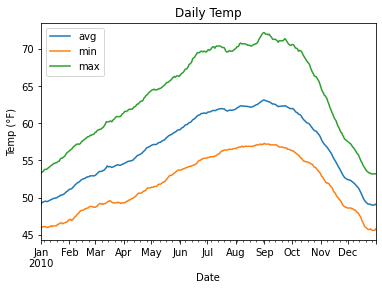

In [5]:
# groups rows by day,  uses max/mean/mean for aggregation, renames temp to other column name
# by aggregation function
# does not alter df
# combines lines into same plot
daily_max = df.resample('D').max().rename(columns={'temp':'max'})
daily_avg = df.resample('D').mean().rename(columns={'temp':'avg'})
daily_min = df.resample('D').min().rename(columns={'temp':'min'})
daily = daily_avg.join([daily_min, daily_max])
daily.plot()
plt.title('Daily Temp')
plt.ylabel('Temp (°F)')
plt.xlabel('Date')
plt.show()

4) Which month is the coldest, on average? <br>
5) Which month has the highest average temperature? <br>

In [7]:
# groups by month and aggregates by mean
# resets index, the index is no longer date-time
monthly_avg = df.resample('M').mean().reset_index()

# finds coldest and hottest months
# everything in square brackets gives a df, the .date takes the .date column from that df
coldest = monthly_avg[monthly_avg.temp == monthly_avg.temp.min()].date
hottest = monthly_avg[monthly_avg.temp == monthly_avg.temp.max()].date

print('Coldest Month:', coldest.dt.month_name().iloc[0])
print('Hottest Month:', hottest.dt.month_name().iloc[0])

Coldest Month: January
Hottest Month: September


6) Resample by the day and calculate the min and max temp for the day <br>
(Hint: .agg(['min', 'max'])). Use this resampled dataframe 
to calculate the change in temperature for the day. 
Which month has the highest daily temperature variability?


In [19]:
# groups by day and aggregates by min and max
# creates a new column for min and another column for max
# date is still the index
dmm = df.resample('D').agg(['min', 'max'])

# creates new column for temp differences between min and max
dmm['delta'] = dmm.temp['max'] - dmm.temp['min']

# groups delta by month and aggregates by mean
# min and max columns have disapeared
dmm = dmm.resample('M').delta.mean()

# finds max temp variability month
# strftime method formats dates, %B is give month name
hvar = dmm[dmm == dmm.max()].index.strftime('%B')[0]
print('Highest temp variability:', hvar)

Highest temp variability: September


7) Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

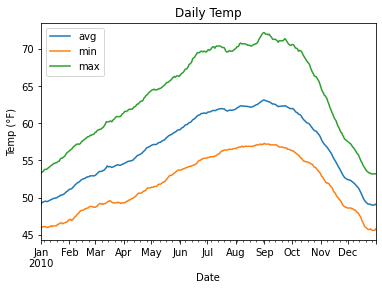

In [20]:
daily = daily_avg.join([daily_min, daily_max])
daily.plot()
plt.title('Daily Temp')
plt.ylabel('Temp (°F)')
plt.xlabel('Date')
plt.show()

In [22]:
s = data.seattle_weather().set_index('date')
s.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [23]:
s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 68.5+ KB


1) Which year and month combination has the highest amount of precipitation?

In [32]:
# groups by month and aggregates by sum
ps = s.resample('M').sum()

# everything in [] gives month with max precipitaion
# then the index is reset and date is no longer the index
# then .date turns the df into a series giving the date and index 0
# then iloc pulls the date from that series
hpd = (ps[ps.precipitation == ps.precipitation.max()]).reset_index().date.iloc[0]

print('Highest amount of precipitation:', hpd.strftime(("%B, %Y")))

Highest amount of precipitation: December, 2015


2) Visualize the amount of monthly precipitation over time.

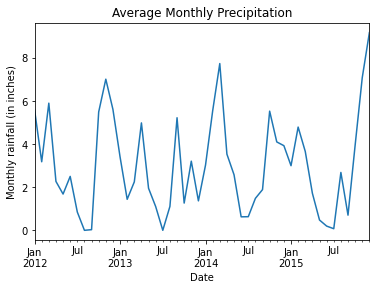

In [33]:
# groups by month and aggregates by mean
aps = s.resample('M').mean()

aps.precipitation.plot()
plt.ylabel('Monthly rainfall (in inches)')
plt.xlabel('Date')
plt.title('Average Monthly Precipitation')
plt.show()

3) Visualize the amount of wind over time. Choose a time interval you think is appropriate.

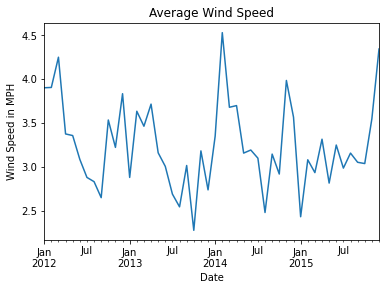

In [34]:
# group by month and aggregate by mean
wdf = s.resample('M').mean()

wdf.wind.plot()
plt.xlabel('Date')
plt.ylabel('Wind Speed in MPH')
plt.title('Average Wind Speed')
plt.show()

4) Which year-month combination is the windiest?

In [36]:
# group by month and aggregate by sum
ws = s.resample('M').sum()

# highest wind date
windy = (ws[ws.wind == ws.wind.max()]).reset_index().date.iloc[0]
print('Windiest Month:', windy.strftime(("%B, %Y")))

Windiest Month: December, 2015


5) What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [44]:
def sum_sun(grp):
    return np.sum(grp=='sun')

# groups by year and aggregates by custom sum_sun function above
# weather give sum of sunny days now instead of weather category
# weather column is renamed to sun_count
weather = s.resample('Y').agg({'weather': sum_sun}).rename(columns={'weather':'sun_count'})
weather.sun_count.max()

sunniest_year = (weather[weather.sun_count == weather.sun_count.max()]).reset_index().date.iloc[0].strftime('%Y')
print('The sunniest year is:', sunniest_year)

The sunniest year is: 2014


6) In which month does it rain the most?¶

In [45]:
# group by month and aggregate by sum
month = s.resample('M').sum()

most_rain = month.sort_values(by='precipitation').tail(1).reset_index().iloc[0].date
print(most_rain.strftime('%B'))

December


7) Which month has the most number of days with a non-zero amount of precipitation?

In [47]:
def norain(grp):
    return np.sum(grp!=0)

# group by month and aggregate by custom norain function above 
# that removes days with no rain, and then sums the rainy days
# rename precipitation to rainy_days
weather = s.resample('M').agg({'precipitation': norain}).rename(columns={'precipitation':'rainy_days'})

rainy_days = weather.rainy_days.sort_values().tail(1).reset_index().date.iloc[0].strftime('%B')
print(rainy_days)

December


In [48]:
# gets the dataframe
f = data.flights_20k()

# sets the data column as the index
f = f.set_index('date')

f.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,-5,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,-15,550,MSY,MCO
2001-03-30 21:45:00,-2,229,STL,IND


In [49]:
f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-13 14:56:00 to 2001-03-14 11:33:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


1) Convert any negative delays to 0

In [51]:
def is_delayed(x):
    if x > 0:
        return x
    else:
        return 0

f.delay = f.delay.apply(lambda x: is_delayed(x))

f.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


2) Which hour of the day has the highest average delay

In [57]:
# group by hour and aggregate by mean
# reset index, so index is no longer date
hourly = f.resample('H').mean().reset_index()

# fills null cells with 0
hourly = hourly.fillna(0)

# date column now only gives hour of day
hourly.date = hourly.date.apply(lambda x: x.strftime('%H'))

# groups by hour in date column and aggregates by mean
hourly = hourly.groupby('date').mean()

# resets index and renames date to hour
hourly = hourly.reset_index().rename(columns={'date':'hour'})

highest_delay = hourly[hourly.delay == hourly.delay.max()].hour.iloc[0]
print('The time of day with the highest delay is:', highest_delay)

The time of day with the highest delay is: 22


3) Does the day of the week make a difference in the delay amount?

In [58]:
# groups by hour and aggregates by mean, resets index
hourly = f.resample('H').mean().reset_index()

# fills nulls with 0
hourly = hourly.fillna(0)

# creates new column day_of_week
# gives date as the weekday name
# %a: abbreviated weekday name, %A full weekday name
hourly['day_of_week'] = hourly.date.apply(lambda x: x.strftime('%A'))

# groups by day_of_week and aggregates by mean
dow = hourly.groupby('day_of_week').mean()

dow

# it appears that the day of the week does have a relationship with delays

,delay,distance
day_of_week,,
Friday,17.344855,370.809138
Monday,6.251825,366.958384
Saturday,7.011741,371.838233
Sunday,8.746833,364.835882
Thursday,11.745785,358.626695
Tuesday,8.591634,360.867082
Wednesday,11.093647,372.189020


4) Does the month make a difference in the delay amount?

In [59]:
# groups by hour and aggregates by mean, resets index
hourly = f.resample('H').mean().reset_index()

# fills nulls with 0
hourly = hourly.fillna(0)

# creates new column for month, fills cells with month name
# %b: abbreviated month name, %B: full month name
hourly['month'] = hourly.date.apply(lambda x: x.strftime('%B'))

# groups by month and aggregates by mean
dow = hourly.groupby('month').mean()

dow

# it appears that month does have a relationship with delays

,delay,distance
month,,
February,12.082455,372.335406
January,9.916790,361.423767
March,8.576662,366.607022
